In [7]:
import numpy as np
import matplotlib.pyplot as plt

import process_mnist
from network import Hopfield_Network

(10000, 785)


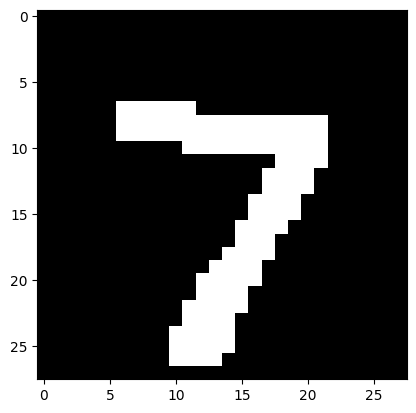

In [8]:
data = np.loadtxt("./data/mnist_test.csv", delimiter=',')
print(data.shape)

# binarize data
maxval = 1
thresh = 0
data_bin = (data > thresh) * maxval
data_bin = np.where(data==0, -1.0, 1.0)

process_mnist.get_image(data_bin[0, 1:])

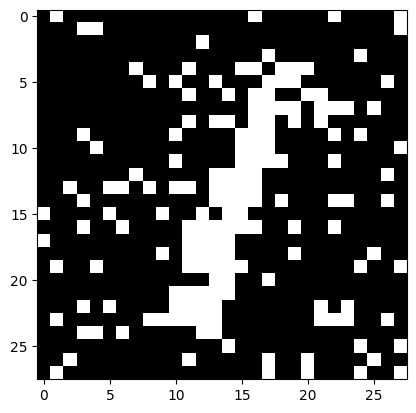

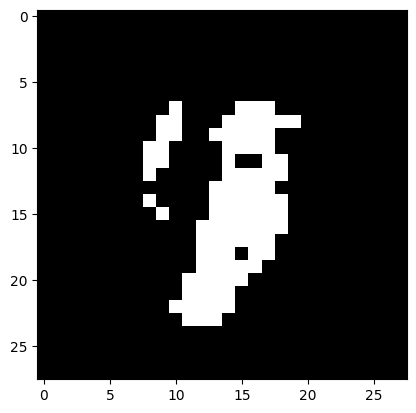

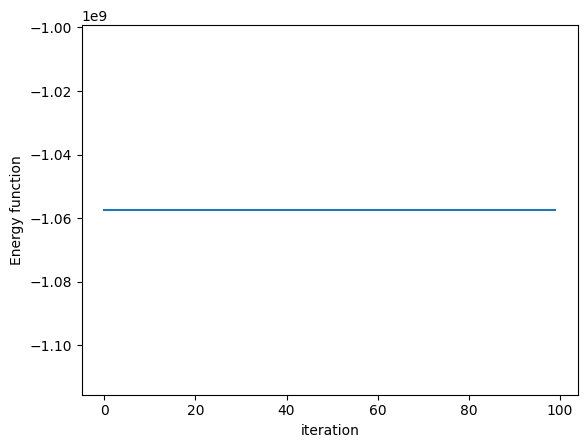

In [9]:
model = Hopfield_Network(len(data_bin[0])-1)

model.fit(data_bin[0:3, 1:])

noisy_data = data_bin[0, 1:].copy()
noisy_data += np.random.normal(0, 1, noisy_data.shape)
noisy_data = np.where(noisy_data > 0, 1, -1)
process_mnist.get_image(noisy_data)

y = model.predict(noisy_data)
process_mnist.get_image(y)
model.plot_energies()